In [1]:
#All packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

#### Dataset importation :

In [2]:
#Dataset importation
dataset = pd.read_csv("ks-projects-201801.csv",delimiter =",")

## 1- Dataset Description :

In our project, we will be using a data set on Kickstarter campaign collected from kaggle.com. The set contains 378 661 observations and 15 different features:



## 2- Dataset Exploration :

In [3]:
dataset.shape

(378661, 15)

Our dataset contains 378 661 observations (lines) and 15 different features (columns).

In [4]:
dataset.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


The response variable “state” is object, and the predictors are mixed with integer, float and object variables.

In [6]:
dataset.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Let's ckeck if we have missing values in our dataset:

In [7]:
dataset.isnull().sum(axis=0) #count the number of MV per column

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

We have missing values in 'name' column and 'usd pledge'column. 

In [8]:
#Back-up Dataset :
original_dataset=dataset

## 3- Data Engeeniring :

#### 3.1- Subset dataset:

We decide to extract Date, Hours, Minutes & Seconds from 'launched'column. We then create 4 new columns 'date_of_lunch', 'hours', 'minutes' & 'seconds' filled by the extracted information.

In [9]:
v = dataset.launched.str.split() #split 'launched' in Date/Hours/Minute/Seconds 
dataset['date_of_launch'] = v.str[0] #We create a new column 'date_of_lunch'that we fill with Date
dataset[['hours', 'minutes', 'seconds']] = ( pd.to_timedelta(v.str[-1]).dt.components.iloc[:, 1:4]) #We create 3 new columns which will be filled by Hours, Minutes & Seconds.

In [10]:
dataset['date_of_launch'] = pd.to_datetime(dataset['date_of_launch']) #Transform it as date type
dataset['deadline'] = pd.to_datetime(dataset['deadline']) #Transform it as date type

We extract Year, Month and Day from 'date_of_launch' column. We then create 3 new columns 'Year', 'Month'& 'Day' filled by the extracted information.

In [11]:
dataset['Year'] = dataset['date_of_launch'].dt.year
dataset['Month'] = dataset['date_of_launch'].dt.month
dataset['Day'] = dataset['date_of_launch'].dt.day

In [12]:
dataset=dataset.drop("launched",axis=1) #Delete 'launched' column

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 21 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
date_of_launch      378661 non-null datetime64[ns]
hours               378661 non-null int64
minutes             378661 non-null int64
seconds             378661 non-null int64
Year                378661 non-null int64
Month               378661 non-null int64
Day            

We have now 21 features (columns) in our dataframe. 

Our dataset contains 378 661 observation. In order to predict the success of Kickstarter campaign, we choose to select only some observations. So, we decide to take into account only 2017's Kickstarter campaign.

In [14]:
year=[2017,2017]
dataset = dataset[dataset.Year.isin(year)]

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52200 entries, 1 to 378654
Data columns (total 21 columns):
ID                  52200 non-null int64
name                52200 non-null object
category            52200 non-null object
main_category       52200 non-null object
currency            52200 non-null object
deadline            52200 non-null datetime64[ns]
goal                52200 non-null float64
pledged             52200 non-null float64
state               52200 non-null object
backers             52200 non-null int64
country             52200 non-null object
usd pledged         52200 non-null float64
usd_pledged_real    52200 non-null float64
usd_goal_real       52200 non-null float64
date_of_launch      52200 non-null datetime64[ns]
hours               52200 non-null int64
minutes             52200 non-null int64
seconds             52200 non-null int64
Year                52200 non-null int64
Month               52200 non-null int64
Day                 52200 non-null i

We now have 52 200 observations.

#### 3.2- Create new columns:

We create a new column 'length_of_campain' which corresponds to the interval of time between launching and the deadline.

In [16]:
dataset['length_of_campain'] = dataset['deadline'].sub(dataset['date_of_launch'], axis=0)

We need to convert 'Length_of_campaign' values as integers, indeed they used to be numpy.timedelta64 type so it was impossible to apply them to our models.

In [17]:
dataset['length_of_campain']=dataset['length_of_campain'].dt.days

We're creating 4 new features : Average amount of money pledge per category, Average goal company hopes to reach per category, average number of backers per category and "Competitors", that accounts the number of competition of the i project based on its main category and on the launch month.

In [18]:
#Creating 4 new features
dataset.loc[:, 'Average_Pledge_Per_Category']= 0
dataset.loc[:, 'Average_Goal_Per_Category']=0
dataset.loc[:, 'Average_NumberofBackers_Per_Category']=0
dataset.loc[:, 'Competitors']=0

Now we fill those columns with the right values

In [19]:
#Mean of pledge per category
dataset["Average_Pledge_Per_Category"]=pd.DataFrame(dataset.groupby(['main_category'])['usd_pledged_real'].transform(lambda x: x.mean()))
dataset["Average_Goal_Per_Category"]=pd.DataFrame(dataset.groupby(['main_category'])['usd_goal_real'].transform(lambda x: x.mean()))
dataset["Average_NumberofBackers_Per_Category"]=round(pd.DataFrame(dataset.groupby(['main_category'])['backers'].transform(lambda x: x.mean())))
dataset["Competitors"] = dataset.groupby(['main_category','Month']).transform(lambda x: x.count())

We got too many decimals on the amount of our averages. Thus,we're rounding the numbers.

In [20]:
dataset.Average_Pledge_Per_Category = round(dataset.Average_Pledge_Per_Category)
dataset.Average_Goal_Per_Category = round(dataset.Average_Goal_Per_Category)

Creating a Difference column which corresponds to USD goal real - Average goal per category

In [21]:
dataset.loc[:, 'Difference']= 0
dataset.Difference = dataset.usd_goal_real - dataset.Average_Goal_Per_Category

Thanks to Difference column we're creating a new feature which will precise if the company tried to raise more than the average for its category or in contrary less than the average for its category.

In [22]:
#Defining an empty list 
Is_Above_Average = []
#Fill the list.
for row in dataset['Difference']:
    if row > 0 :
        Is_Above_Average.append(1)
    else :
        Is_Above_Average.append(0)
        
dataset['Is_Above_Average'] = Is_Above_Average

Now we remove Difference column

In [23]:
dataset.drop(columns = ["Difference"], inplace = True)

We create another column called "Day_of_the_week", for each project we indicated the day of the week at which it has been launched.

In [24]:
import datetime
datetime.datetime.strptime('2017-09-03', '%Y-%M-%d').strftime('%A')
dataset.loc[:, 'Day_of_the_week']=0
dataset['Day_of_the_week'] = pd.to_datetime(dataset['date_of_launch'])
dataset['Day_of_the_week'] = dataset['Day_of_the_week'].dt.weekday_name
dataset.head()

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,...,Year,Month,Day,length_of_campain,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Competitors,Is_Above_Average,Day_of_the_week
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,...,2017,9,2,60,5808.0,164850.0,60.0,397,0,Saturday
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,94175.00,successful,761,...,2017,4,5,28,22930.0,21266.0,317.0,592,0,Wednesday
21,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,1.00,failed,1,...,2017,8,8,30,6042.0,19000.0,57.0,396,0,Tuesday
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,57577.31,successful,840,...,2017,4,3,30,5808.0,164850.0,60.0,513,0,Monday
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,592.00,live,24,...,2017,11,20,60,4726.0,15463.0,78.0,476,0,Monday


Now we're transforming it as a categorical variable, with Sunday = 1...Saturday = 6

In [25]:
dataset['Day_of_the_week'].replace(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],[1,2,3,4,5,6,7], inplace=True)

We created another column called "Number_of_Words" that count the number of words a project has.
We'll check with the correlation heatmap if it has an impact on the state.

In [26]:
dataset.loc[:,'Name_Number_Letters']=dataset['name']
dataset['Name_Number_Letters']=dataset['Name_Number_Letters'].str.len()

We created another column called "Name_Number_Letters" that count the number of letters a project has. We'll check with the correlation heatmap if it has an impact on the state.

In [27]:
dataset.loc[:, 'Number_of_words']=dataset['name']
dataset['Number_of_words']=dataset['Number_of_words'].str.strip().str.split('[\W_]+')
dataset['Number_of_words']=dataset['Number_of_words'].str.len()
dataset.head()

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,...,Day,length_of_campain,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Competitors,Is_Above_Average,Day_of_the_week,Name_Number_Letters,Number_of_words
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,...,2,60,5808.0,164850.0,60.0,397,0,7,45,8
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,94175.00,successful,761,...,5,28,22930.0,21266.0,317.0,592,0,4,57,10
21,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,1.00,failed,1,...,8,30,6042.0,19000.0,57.0,396,0,3,32,4
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,57577.31,successful,840,...,3,30,5808.0,164850.0,60.0,513,0,2,29,5
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,592.00,live,24,...,20,60,4726.0,15463.0,78.0,476,0,2,38,5


## 4- Data Visualization:

We plotted those days against the outputs "success" "failure" to check if one can notice a trend. Indeed, some days are more "propice" than others.

In [28]:
import matplotlib.pyplot as plt
plt.hist(x=dataset['Day_of_the_week'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Day Of Week')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
plt.show()

<Figure size 640x480 with 1 Axes>

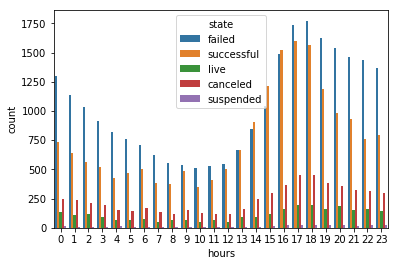

In [29]:
import seaborn as sns
sns.countplot(x="hours",hue = 'state' ,data=dataset)

In [30]:
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import *
from plotly import tools
from plotly.plotly import iplot
import plotly.plotly as py
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [31]:
groupby_main_category = dataset.groupby('main_category').mean()
trace1 = go.Bar(
            x=groupby_main_category['Average_NumberofBackers_Per_Category'].index,
            y=groupby_main_category['Average_NumberofBackers_Per_Category'].values,
            opacity=0.65
        )

trace2 = go.Bar(
            x=groupby_main_category['Average_Pledge_Per_Category'].index,
            y=groupby_main_category['Average_Pledge_Per_Category'].values,
            opacity=0.65
        )

trace3 = go.Bar(
            x=groupby_main_category['Average_Goal_Per_Category'].index,
            y=groupby_main_category['Average_Goal_Per_Category'].values,
            opacity=0.65
        )

trace4 = go.Bar(
            x=groupby_main_category['length_of_campain'].index,
            y=groupby_main_category['length_of_campain'].values,
            opacity=0.65
        )
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Backers', 'Average Money Pledged','Average Goal Amount','Duration(days)'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=900, title='Distributions according to Main Category of Successful Campaigns')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



## 5- Features selection :

#### 5.1- Elimination of features

'usd_goal_real' is too diverse. Thus, we decide to create ranges.

In [32]:
bins = np.array([0,1000,2000,3000,4000, 5000, 10000, 20000, 30000,40000,50000,60000,70000,80000,90000,100000,200000,300000,400000,500000,1000000,10000000,100000000,1000000000])
dataset['usd_goal_real'] = np.digitize(dataset['usd_goal_real'], bins)

We remove 'pledged' and 'goal' columns because their information is already in following columns :'usd_pledged_real' and 'usd_goal_real'. We decide to keep 'usd_pledged_real' and 'usd_goal_real' because it's more convenient to compare values in same currency.

In [33]:
dataset.drop(columns=['pledged'], inplace= True)
dataset.drop(columns=["goal"], inplace= True)


We remove usd pledged because Usd_pledged_real seems more accurate

In [34]:
dataset.drop(columns = ["usd pledged"], inplace =True)

We remove 'category' column because it's too diverse and 'main_category'column contains main information of 'category'

In [35]:
dataset.drop(columns = ["category"], inplace =True)

We decide to remove 'seconds','Day'& 'minutes' because it's too diverse and we judge it non relevant for our analysis.

In [36]:
dataset.drop(columns = ["seconds"], inplace = True)
dataset.drop(columns = ["Day"], inplace = True)
dataset.drop(columns = ["minutes"], inplace = True)

We remove ligns whose states are live, meaning that the campaign is still running.

In [37]:
dataset = dataset[dataset.state != "live"]

We remove ligns whose states are canceled and suspended

In [38]:
dataset['state'].value_counts()['suspended']/dataset['state'].shape*100
dataset['state'].value_counts()['canceled']/dataset['state'].shape*100

array([11.64260475])

11.64% of Kickstarter campaigns of our dataset has been canceled during the campaign. Since the states ‘successful’ and ‘failed’ states comprise of almost 88% of the data-set with the rest of states being in minority, we can focus on the 2 predominant states here for now and so delete rows for canceled and suspended campaigns. Moreover, es raisons pour lesquelles ils ont canceled vont au delà des datas qu'on a.

In [39]:
dataset= dataset[dataset.state != 'canceled']
dataset=dataset[dataset.state != 'suspended']

On discretize la colonne 'state'. 0 correspond à failed et 1 a succes.

In [40]:
dataset["state"]= dataset['state'].map({'failed': 0,'successful': 1})

We create a new column average sucess per category

In [41]:
dataset.loc[:, 'Av_Success_Rate_Per_Category']=0
dataset["Av_Success_Rate_Per_Category"]=pd.DataFrame(dataset.groupby(['main_category','Month'])['state'].transform(lambda x: x.mean()))

Remove 'deadline'and 'date_of_launch'. Toutes les informations sont deja contenues dans month:month of launch et length_of_campaign. De plus, pas sur que le format date soit exploitable pour nos modeles.

In [42]:
dataset.drop(columns = ["deadline"], inplace =True)
dataset.drop(columns = ["date_of_launch"], inplace =True)

Remove 'year' column because we decide to take only 2017 Kickstarter campaign

In [43]:
dataset.drop(columns = ["Year"], inplace =True)

#### 5.2- Discretization :

In [44]:
dataset['currency']=dataset['currency'].map({'USD': 1, 'GBP': 2, 'EUR': 3,'CAD': 4,'AUD':5,'MXN':6,'HKD':7,'SEK':8,'SGD':9,'NZD':10,'CHF':11,'DKK':12,'NOK':13,'JPY':14})
dataset['country']=dataset['country'].map({'US': 1, 'GB': 2, 'CA': 3,'AU': 4,'MX':5,'DE':6,'IT':7,'FR':8,'ES':9,'NL':10,'HK':11,'SE':12,'SG':13,'NZ':14,'CH':15,'DK':16,'IE':17,'BE':18,'AT':19,'NO':20,'JP':21,'LU':22})

Discretize main category

In [45]:
dataset['main_category']=dataset['main_category'].map({'Games':1,'Technology':2,'Film & Video':3,'Design':4,'Publishing':5,'Music':6,'Fashion':7,'Art':8,'Food':9,'Comics':10,'Crafts':11,'Photography':12,'Theater':13,'Journalism':14,'Dance':15})

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43419 entries, 1 to 378654
Data columns (total 21 columns):
ID                                      43419 non-null int64
name                                    43419 non-null object
main_category                           43419 non-null int64
currency                                43419 non-null int64
state                                   43419 non-null int64
backers                                 43419 non-null int64
country                                 43419 non-null int64
usd_pledged_real                        43419 non-null float64
usd_goal_real                           43419 non-null int64
hours                                   43419 non-null int64
Month                                   43419 non-null int64
length_of_campain                       43419 non-null int64
Average_Pledge_Per_Category             43419 non-null float64
Average_Goal_Per_Category               43419 non-null float64
Average_NumberofBackers_Per_C

Toutes nos colonnes sont discretizer, a part les noms.

#### 5.3- Correlation exploration 

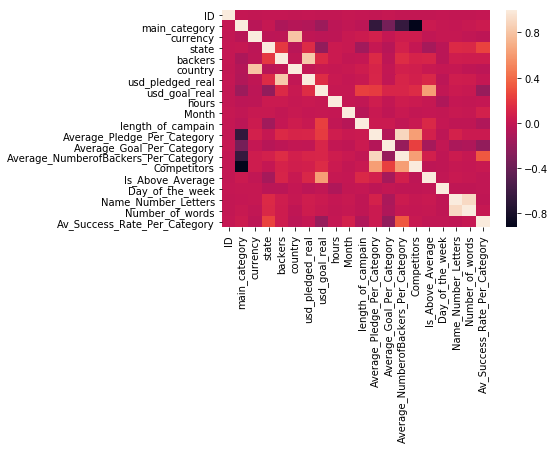

In [47]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [48]:
def color_maxs_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0.6 else 'black'
    return 'color: %s' % color

In [49]:
corr.style.applymap(color_maxs_red)

,ID,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,hours,Month,length_of_campain,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Competitors,Is_Above_Average,Day_of_the_week,Name_Number_Letters,Number_of_words,Av_Success_Rate_Per_Category
ID,1,0.00429877,-0.00341278,0.000652179,0.00353566,0.00051649,0.00283546,-0.000687098,-0.00182686,0.00814702,0.00376656,-0.00400242,0.0090546,-0.0058401,-0.00389622,-0.00109953,0.00211653,-0.00391119,-0.00383519,0.00334137
main_category,0.00429877,1,-0.0482212,0.0110438,-0.0979587,-0.061036,-0.0747097,-0.177278,-0.0328819,-0.0143581,-0.0324055,-0.663388,-0.352261,-0.648975,-0.923644,0.0345422,0.012106,0.00283141,0.0159971,0.0456437
currency,-0.00341278,-0.0482212,1,-0.0315244,-0.0250707,0.798153,-0.0165296,-0.0304707,-0.025609,0.018166,0.0446324,0.0774533,0.00515561,0.049597,0.0494895,-0.00857003,0.0148098,0.0107154,-0.0123183,-0.0234687
state,0.000652179,0.0110438,-0.0315244,1,0.196018,-0.0473064,0.141837,-0.219129,0.0362288,0.0190816,-0.154938,0.00911821,-0.0525842,0.0788178,0.00500577,-0.131454,-0.0411838,0.128426,0.127737,0.241956
backers,0.00353566,-0.0979587,-0.0250707,0.196018,1,-0.0176031,0.821593,0.135816,0.030681,-0.000352286,0.00422106,0.132839,-0.029087,0.150159,0.0917061,0.104431,-0.0397037,0.0574449,0.0459343,0.0487092
country,0.00051649,-0.061036,0.798153,-0.0473064,-0.0176031,1,-0.00780805,0.0165724,0.0103928,0.0203281,0.0510624,0.0993414,-0.00430331,0.0685732,0.0621829,0.0174161,0.0057507,0.0106299,-0.0147995,-0.0338986
usd_pledged_real,0.00283546,-0.0747097,-0.0165296,0.141837,0.821593,-0.00780805,1,0.148901,0.0239787,0.00342062,0.0159839,0.111774,-0.00775011,0.100116,0.0700394,0.116966,-0.029558,0.0581667,0.0469524,0.00485944
usd_goal_real,-0.000687098,-0.177278,-0.0304707,-0.219129,0.135816,0.0165724,0.148901,1,0.0148816,0.0120442,0.231773,0.212285,0.112634,0.105916,0.142339,0.621945,-0.0127571,0.0343308,0.0170389,-0.19893
hours,-0.00182686,-0.0328819,-0.025609,0.0362288,0.030681,0.0103928,0.0239787,0.0148816,1,0.00415795,-0.0109156,0.056135,-0.00381698,0.0508693,0.030928,0.0129408,-0.0945616,0.00431109,0.000138296,0.000712816
Month,0.00814702,-0.0143581,0.018166,0.0190816,-0.000352286,0.0203281,0.00342062,0.0120442,0.00415795,1,-0.0521717,0.0264301,-0.0174699,0.0276093,-0.00421858,0.00431258,-0.00310319,0.0182325,0.0113601,0.0788641


In [50]:
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm)

,ID,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,hours,Month,length_of_campain,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Competitors,Is_Above_Average,Day_of_the_week,Name_Number_Letters,Number_of_words,Av_Success_Rate_Per_Category
ID,1,0.00429877,-0.00341278,0.000652179,0.00353566,0.00051649,0.00283546,-0.000687098,-0.00182686,0.00814702,0.00376656,-0.00400242,0.0090546,-0.0058401,-0.00389622,-0.00109953,0.00211653,-0.00391119,-0.00383519,0.00334137
main_category,0.00429877,1,-0.0482212,0.0110438,-0.0979587,-0.061036,-0.0747097,-0.177278,-0.0328819,-0.0143581,-0.0324055,-0.663388,-0.352261,-0.648975,-0.923644,0.0345422,0.012106,0.00283141,0.0159971,0.0456437
currency,-0.00341278,-0.0482212,1,-0.0315244,-0.0250707,0.798153,-0.0165296,-0.0304707,-0.025609,0.018166,0.0446324,0.0774533,0.00515561,0.049597,0.0494895,-0.00857003,0.0148098,0.0107154,-0.0123183,-0.0234687
state,0.000652179,0.0110438,-0.0315244,1,0.196018,-0.0473064,0.141837,-0.219129,0.0362288,0.0190816,-0.154938,0.00911821,-0.0525842,0.0788178,0.00500577,-0.131454,-0.0411838,0.128426,0.127737,0.241956
backers,0.00353566,-0.0979587,-0.0250707,0.196018,1,-0.0176031,0.821593,0.135816,0.030681,-0.000352286,0.00422106,0.132839,-0.029087,0.150159,0.0917061,0.104431,-0.0397037,0.0574449,0.0459343,0.0487092
country,0.00051649,-0.061036,0.798153,-0.0473064,-0.0176031,1,-0.00780805,0.0165724,0.0103928,0.0203281,0.0510624,0.0993414,-0.00430331,0.0685732,0.0621829,0.0174161,0.0057507,0.0106299,-0.0147995,-0.0338986
usd_pledged_real,0.00283546,-0.0747097,-0.0165296,0.141837,0.821593,-0.00780805,1,0.148901,0.0239787,0.00342062,0.0159839,0.111774,-0.00775011,0.100116,0.0700394,0.116966,-0.029558,0.0581667,0.0469524,0.00485944
usd_goal_real,-0.000687098,-0.177278,-0.0304707,-0.219129,0.135816,0.0165724,0.148901,1,0.0148816,0.0120442,0.231773,0.212285,0.112634,0.105916,0.142339,0.621945,-0.0127571,0.0343308,0.0170389,-0.19893
hours,-0.00182686,-0.0328819,-0.025609,0.0362288,0.030681,0.0103928,0.0239787,0.0148816,1,0.00415795,-0.0109156,0.056135,-0.00381698,0.0508693,0.030928,0.0129408,-0.0945616,0.00431109,0.000138296,0.000712816
Month,0.00814702,-0.0143581,0.018166,0.0190816,-0.000352286,0.0203281,0.00342062,0.0120442,0.00415795,1,-0.0521717,0.0264301,-0.0174699,0.0276093,-0.00421858,0.00431258,-0.00310319,0.0182325,0.0113601,0.0788641


Based on the Heatmap, we remove currency variable because this variable is highly corelated with country (0.798)
Moreover, backers and USD pledge real are also highly correlated, (0.82)

In [51]:
dataset.drop(columns = ["currency"], inplace =True)
dataset.drop(columns = ["backers"], inplace =True)

In [52]:
dataset.drop(columns = ["name"], inplace =True)

We also observed that number of letters and number of words in the company names are really high correlated. However, we're keeping them to test an RFE or Best K features.


In [53]:
dataset.drop(columns = ["usd_pledged_real"], inplace =True)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43419 entries, 1 to 378654
Data columns (total 17 columns):
ID                                      43419 non-null int64
main_category                           43419 non-null int64
state                                   43419 non-null int64
country                                 43419 non-null int64
usd_goal_real                           43419 non-null int64
hours                                   43419 non-null int64
Month                                   43419 non-null int64
length_of_campain                       43419 non-null int64
Average_Pledge_Per_Category             43419 non-null float64
Average_Goal_Per_Category               43419 non-null float64
Average_NumberofBackers_Per_Category    43419 non-null float64
Competitors                             43419 non-null int64
Is_Above_Average                        43419 non-null int64
Day_of_the_week                         43419 non-null int64
Name_Number_Letters           

From this first selection we reorganise columns.

In [55]:
inserted_cols = ['ID','main_category','Name_Number_Letters','Number_of_words','country','hours','Day_of_the_week','Month','length_of_campain','usd_goal_real','Competitors','Average_Pledge_Per_Category','Average_Goal_Per_Category','Average_NumberofBackers_Per_Category','Av_Success_Rate_Per_Category','Is_Above_Average','state']
cols = ([col for col in inserted_cols if col in dataset] 
        + [col for col in dataset if col not in inserted_cols]) #Reogarnize columns to be more readable. 
dataset = dataset[cols]
dataset.head()

,ID,main_category,Name_Number_Letters,Number_of_words,country,hours,Day_of_the_week,Month,length_of_campain,usd_goal_real,Competitors,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Av_Success_Rate_Per_Category,Is_Above_Average,state
1,1000003930,3,45,8,1,4,7,9,60,9,397,5808.0,164850.0,60.0,0.422857,0,0
14,1000057089,1,57,10,2,19,4,4,28,6,592,22930.0,21266.0,317.0,0.524691,0,1
21,1000081649,7,32,4,4,1,3,8,30,3,396,6042.0,19000.0,57.0,0.349112,0,0
29,100011318,3,29,5,1,17,2,4,30,11,513,5808.0,164850.0,60.0,0.449024,0,1
43,1000170964,1,55,11,1,4,5,3,25,2,691,22930.0,21266.0,317.0,0.538328,0,0


#### 5.4- Checking importance of data with KBEST and RFE


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Define Output function Y and variables function X

In [57]:
dataset.shape

(43419, 17)

In [58]:
databest=dataset
array = databest.head()


In [59]:
X = array.iloc[:,0:16]
Y = array.iloc[:,16]
X.shape

(5, 16)

In [60]:
test = SelectKBest(score_func=chi2, k=10)
fitkbest = test.fit(X, Y)

In [61]:
np.set_printoptions(precision=1)
print(fitkbest.scores_)
features = fitkbest.transform(X)


[3.0e+08 1.1e+00 2.8e-02 4.4e-03 1.7e-01 3.0e+01 1.1e+00 1.5e+00 3.0e+00
 2.8e+00 7.8e+00 7.3e+02 9.3e+03 1.4e+01 6.6e-03     nan]


In [62]:
print(features[0:11,:])

[[1.0e+09 4.0e+00 7.0e+00 9.0e+00 6.0e+01 9.0e+00 4.0e+02 5.8e+03 1.6e+05
  6.0e+01]
 [1.0e+09 1.9e+01 4.0e+00 4.0e+00 2.8e+01 6.0e+00 5.9e+02 2.3e+04 2.1e+04
  3.2e+02]
 [1.0e+09 1.0e+00 3.0e+00 8.0e+00 3.0e+01 3.0e+00 4.0e+02 6.0e+03 1.9e+04
  5.7e+01]
 [1.0e+08 1.7e+01 2.0e+00 4.0e+00 3.0e+01 1.1e+01 5.1e+02 5.8e+03 1.6e+05
  6.0e+01]
 [1.0e+09 4.0e+00 5.0e+00 3.0e+00 2.5e+01 2.0e+00 6.9e+02 2.3e+04 2.1e+04
  3.2e+02]]


###### RFE

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
rfe = RFE(model, 10)
fitrfe = rfe.fit(X, Y)


C:\Users\david\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\david\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\david\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\david\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\david\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22

In [65]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False  True False False  True  True  True  True
  True  True False False]
[1 2 1 1 3 1 6 5 1 1 1 1 1 1 4 7]


In [66]:
dataset.head()

,ID,main_category,Name_Number_Letters,Number_of_words,country,hours,Day_of_the_week,Month,length_of_campain,usd_goal_real,Competitors,Average_Pledge_Per_Category,Average_Goal_Per_Category,Average_NumberofBackers_Per_Category,Av_Success_Rate_Per_Category,Is_Above_Average,state
1,1000003930,3,45,8,1,4,7,9,60,9,397,5808.0,164850.0,60.0,0.422857,0,0
14,1000057089,1,57,10,2,19,4,4,28,6,592,22930.0,21266.0,317.0,0.524691,0,1
21,1000081649,7,32,4,4,1,3,8,30,3,396,6042.0,19000.0,57.0,0.349112,0,0
29,100011318,3,29,5,1,17,2,4,30,11,513,5808.0,164850.0,60.0,0.449024,0,1
43,1000170964,1,55,11,1,4,5,3,25,2,691,22930.0,21266.0,317.0,0.538328,0,0


Import libraries we'll need for XGboost and other models 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [68]:
x = dataset.drop(columns = "state")
y = dataset.state

### Split Train-Validation-Test

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [114]:
X_training,X_validation,Y_training,Y_validation = train_test_split(X_train,Y_train, test_size = 0.20, random_state = 42)


(27788, 16)

### XGboost

In [112]:
#XGboost

xgb = XGBClassifier()
parameters = dict(model__max_depth=[3,5,9],
                  model__learning_rate=[.01,0.05, .1],
                  model__n_estimators=[100, 500])

                     
grid_search = GridSearchCV(xgb,param_grid = parameters,scoring='accuracy', verbose=1, cv=10)



In [113]:
grid_search.fit(X_training,Y_training)

# make predictions for test data
y_pred = grid_search.predict(X_validation)

accuracy = accuracy_score(Y_validation, y_pred)
print(accuracy)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.8min finished


0.6781344465236793


### Catboost

In [80]:
from catboost import CatBoostClassifier

In [109]:
clf = CatBoostClassifier(depth=6, iterations=1000, learning_rate=0.1, thread_count=16, logging_level='Silent')
clf.fit(X_training, Y_training)

In [110]:
Y_pred = clf.predict(X_validation)

In [111]:
accuracyCat = accuracy_score(Y_validation,Y_pred)
print(accuracyCat)

0.6779904994961854
